In [1]:
import librosa
import os
import soundfile as sf
import numpy as np

In [2]:
COMPRESSION_RATES = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
FEELINGS = ["positive", "negative", "neutrale"]
path_to_audio = "../sound/sound_files/original_sound"

In [15]:
def time_compress(in_path, word, factor):
    """Time-compress by factor"""
    y, sr = librosa.load(in_path, sr=None)
    y_fast = librosa.effects.time_stretch(y, rate=1 + factor)
    out_path = f"audio/{factor}/{word}_compressed.wav"
    os.makedirs(os.path.dirname(out_path), exist_ok=True)
    sf.write(out_path, y_fast, sr)
    return out_path

def loop_time_compress(file, feeling, factor):
    if file.endswith(".wav"):
        word = file[:-4]
        in_path = f"../sound/sound_files/original_sound/{feeling}-ord-real/{file}"
        for rate in COMPRESSION_RATES:
            time_compress(in_path, word, rate)
    return

In [17]:
for feeling in FEELINGS:
    for file in os.listdir(f"../sound/sound_files/original_sound/{feeling}-ord-real"):
        if file.endswith(".wav"):    
            for factor in COMPRESSION_RATES:
                loop_time_compress(file, feeling, factor)


In [29]:
file_len= []

for feeling in FEELINGS:
    for file in os.listdir(f"../sound/sound_files/original_sound/{feeling}-ord-real"):
        if file.endswith(".wav"):
            y, sr = librosa.load(f"../sound/sound_files/original_sound/{feeling}-ord-real/{file}", sr=None)
            file_len.append(librosa.get_duration(y=y, sr=sr))
        

0.7806986882943681 0.4435437359480563


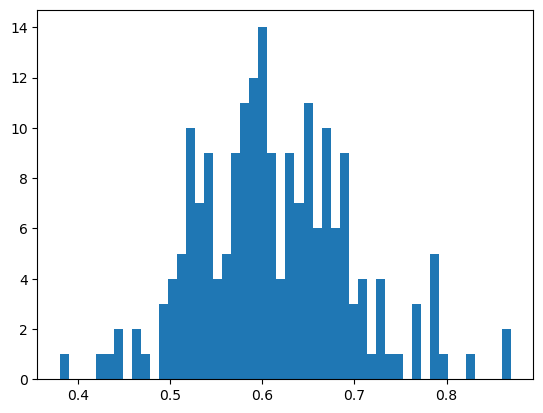

In [44]:
import matplotlib.pyplot as plt
file_len = np.sort(file_len)
#plt.scatter(range(len(file_len)), file_len)
#plt.plot([np.mean(file_len)]*len(file_len))
plt.hist(file_len, bins=50)

s = np.std(file_len)
print(np.mean(file_len) + 2*s, np.mean(file_len)-2*s)

In [ ]:
# for file in os.listdir("sound_files/original_sound/neutrale-ord-real"):
#     if file.endswith(".wav"):
#         word = file[:-4]  # Remove .wav extension
#         in_path = f"sound_files/original_sound/neutrale-ord-real/{file}"
#         out_path_reversed = reverse_audio(in_path, word, "neutrale")
    